# How AES Works

### Keyed Permutations

crypto{bijection}

### Resisting Bruteforce

crypto{biclique}

### Structure of AES

In [3]:
def bytes2matrix(text):
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    return bytes(sum(matrix, []))

matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105],
    [110, 109, 97, 116],
    [114, 105, 120, 125],
]
print(matrix2bytes(matrix).decode())

crypto{inmatrix}


### Round Keys

In [5]:
def add_round_key(state, round_key):
    result = []
    for i in range(len(state)):
        row = []
        for j in range(len(state[0])):
            row.append(state[i][j] ^ round_key[i][j])
        result.append(row)
    return result

def matrix2bytes(matrix):
    return bytes(sum(matrix, []))

state = [
    [206, 243, 61, 34],
    [171, 11, 93, 31],
    [16, 200, 91, 108],
    [150, 3, 194, 51],
]
round_key = [
    [173, 129, 68, 82],
    [223, 100, 38, 109],
    [32, 189, 53, 8],
    [253, 48, 187, 78],
]

result = add_round_key(state, round_key)
flag = matrix2bytes(result)
print(flag.decode())

crypto{r0undk3y}


### Confusion through Substitution

In [7]:
def matrix2bytes(matrix):
   return bytes(sum(matrix, []))

def sub_bytes(state, sbox):
   result = []
   for i in range(len(state)):
       row = []
       for j in range(len(state[0])):
           row.append(sbox[state[i][j]])
       result.append(row)
   return result

s_box = (
   0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
   0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
   0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
   0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
   0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
   0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
   0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
   0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
   0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
   0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
   0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
   0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
   0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
   0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
   0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
   0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)
inv_s_box = (
   0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
   0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
   0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
   0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
   0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
   0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
   0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
   0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
   0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
   0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
   0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
   0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
   0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
   0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
   0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
   0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)
state = [
   [251, 64, 182, 81],
   [146, 168, 33, 80],
   [199, 159, 195, 24],
   [64, 80, 182, 255],
]

print(matrix2bytes(sub_bytes(state, sbox=inv_s_box)).decode())

crypto{l1n34rly}


### Diffusion through Permutation

In [9]:
def xtime(a): 
    return (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)

def mix_single_column(a):
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)

def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])

def inv_mix_columns(s):
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v
    mix_columns(s)

def inv_shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[3][1], s[0][1], s[1][1], s[2][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[1][3], s[2][3], s[3][3], s[0][3]

state = [
    [108, 106, 71, 86],
    [96, 62, 38, 72],
    [42, 184, 92, 209],
    [94, 79, 8, 54],
]
inv_mix_columns(state)
inv_shift_rows(state)
print(bytes(sum(state, [])).decode())

crypto{d1ffUs3R}


### Bringing It All Together

In [37]:
N_ROUNDS = 10
key        = b'\xc3,\\\xa6\xb5\x80^\x0c\xdb\x8d\xa5z*\xb6\xfe\\'
ciphertext = b'\xd1O\x14j\xa4+O\xb6\xa1\xc4\x08B)\x8f\x12\xdd'
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)
inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

def bytes2matrix(text):
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    out = []
    for r in matrix:
        for c in r:
            out.append(c.to_bytes(2,byteorder='little').decode())
    return ''.join(out)

def inv_shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[3][1], s[0][1], s[1][1], s[2][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[1][3], s[2][3], s[3][3], s[0][3]

def inv_sub_bytes(s, sbox=inv_s_box):
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = (sbox[s[i][j]])


def add_round_key(s, k):
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = (s[i][j] ^ k[i][j])

xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)

def mix_single_column(a):
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)

def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])

def inv_mix_columns(s):
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v
    mix_columns(s)

def expand_key(master_key):
    # Round constants https://en.wikipedia.org/wiki/AES_key_schedule#Round_constants
    r_con = (
        0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
        0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
        0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
        0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
    )
    key_columns = bytes2matrix(master_key)
    iteration_size = len(master_key) // 4
    i = 1
    while len(key_columns) < (N_ROUNDS + 1) * 4:
        word = list(key_columns[-1])
        if len(key_columns) % iteration_size == 0:
            word.append(word.pop(0))
            word = [s_box[b] for b in word]
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            word = [s_box[b] for b in word]
        word = bytes(i^j for i, j in zip(word, key_columns[-iteration_size]))
        key_columns.append(word)
    return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]

def decrypt(key, ciphertext):
    round_keys = expand_key(key)
    state = bytes2matrix(ciphertext)
    add_round_key(state,round_keys[-1])
    for i in range(N_ROUNDS - 1, 0, -1):
        inv_shift_rows(state)
        inv_sub_bytes(state, inv_s_box)
        add_round_key(state,round_keys[i])
        inv_mix_columns(state)
    inv_shift_rows(state)
    inv_sub_bytes(state, inv_s_box)
    add_round_key(state,round_keys[0])
    plaintext = matrix2bytes(state)
    return plaintext

print(decrypt(key, ciphertext))

c r y p t o { M Y A E S 1 2 8 } 


# Symmetric Starter

### Modes of Operation Starter

In [38]:
import requests
from binascii import unhexlify

def get_flag():
    r = requests.get("https://aes.cryptohack.org/block_cipher_starter/encrypt_flag/")
    ciphertext = r.json()["ciphertext"]
    r = requests.get(f"https://aes.cryptohack.org/block_cipher_starter/decrypt/{ciphertext}/")
    plaintext_hex = r.json()["plaintext"]
    flag = unhexlify(plaintext_hex).decode()
    return flag

print(get_flag())

crypto{bl0ck_c1ph3r5_4r3_f457_!}


### Passwords as Keys

In [43]:
from Crypto.Cipher import AES
import hashlib
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def get_ciphertext():
    r = requests.get("http://aes.cryptohack.org/passwords_as_keys/encrypt_flag/")
    return r.json()["ciphertext"]

def get_wordlist():
    r = requests.get("https://gist.githubusercontent.com/wchargin/8927565/raw/d9783627c731268fb2935a731a618aa8e95cf465/words")
    return [w.strip() for w in r.text.splitlines()]

def try_decrypt(word, ciphertext):
    key = hashlib.md5(word.encode()).digest()
    cipher = AES.new(key, AES.MODE_ECB)
    try:
        decrypted = cipher.decrypt(bytes.fromhex(ciphertext))
        if b"crypto{" in decrypted:
            return decrypted
    except:
        pass
    return None

def main():
    print("Downloading ciphertext...")
    ct = get_ciphertext()
    print("Downloading wordlist...")
    words = get_wordlist()
    print(f"Starting decryption with {len(words)} words...")
    with ThreadPoolExecutor(max_workers=20) as executor:
        futures = {executor.submit(try_decrypt, word, ct): word for word in words}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Testing passwords"):
            result = future.result()
            if result:
                word = futures[future]
                print(f"\nFound flag using word '{word}': {result.decode()}")
                return

if __name__ == "__main__":
    main()

Starting decryption with 99171 words...


Testing passwords:  24%|██▍       | 23794/99171 [00:00<00:01, 45615.64it/s]



Found flag using word 'bluebell': crypto{k3y5__r__n07__p455w0rdz?}


# Block Ciphers 1

### ECB CBC WTF

In [45]:
import requests
from Crypto.Util.strxor import strxor
import binascii

def get_encrypted_flag():
    r = requests.get("https://aes.cryptohack.org/ecbcbcwtf/encrypt_flag/")
    return r.json()["ciphertext"]

def decrypt_ecb(ciphertext):
    r = requests.get(f"https://aes.cryptohack.org/ecbcbcwtf/decrypt/{ciphertext}/")
    return r.json()["plaintext"]

ciphertext = get_encrypted_flag()
iv = binascii.unhexlify(ciphertext[:32])
encrypted_blocks = [
    binascii.unhexlify(ciphertext[i:i+32])  
    for i in range(32, len(ciphertext), 32)
]
decrypted_blocks = []
for block in encrypted_blocks:
    dec = binascii.unhexlify(decrypt_ecb(block.hex()))
    decrypted_blocks.append(dec)
plaintext_blocks = []
prev_block = iv
for i, block in enumerate(decrypted_blocks):
    plaintext = strxor(block, prev_block)
    plaintext_blocks.append(plaintext)
    prev_block = encrypted_blocks[i]
flag = b''.join(plaintext_blocks)
print(flag.decode())

crypto{3cb_5uck5_4v01d_17_!!!!!}


### ECB Oracle

In [3]:
import requests

s = requests.session()

def encrypt(data):
	r = s.get(f"http://aes.cryptohack.org/ecb_oracle/encrypt/{data.hex()}/")
	return(bytes.fromhex(r.json()["ciphertext"]))

def encrypt_big(data):
	MAX_SIZE = 0x10*56
	for i in range((len(data)-1)//MAX_SIZE+1):
		block = data[i*MAX_SIZE:(i+1)*MAX_SIZE]
		ct = encrypt(block)[:len(block)]
		for j in range(len(ct)//0x10):
			yield ct[j*0x10:(j+1)*0x10]

charset = list(b"etoanihsrdlucgwyfmpbkvjxqz{}_01234567890ETOANIHSRDLUCGWYFMPBKVJXQZ")
for i in range(0x100):
	if i not in charset:
		charset.append(i)
targets = [encrypt(b"A"*(0x10-i)) for i in range(0x10)]
lengths = list(map(len, targets))
flag_len = lengths[-1] - 0x11 + lengths.index(lengths[-1])
flag = b""
for _ in range(flag_len):
	b, i = divmod(len(flag) + 1, 0x10)
	target = targets[i][b*0x10:(b+1)*0x10]
	attempts = b""
	for c in charset:
		attempts += (b"A"*0x10+flag+bytes([c]))[-0x10:]
	for c, ct in zip(charset, encrypt_big(attempts)):
		if ct == target:
			flag += bytes([c])
			print(flag.decode())
			break
	else:
		exit("oof")

c
cr
cry
cryp
crypt
crypto
crypto{
crypto{p
crypto{p3
crypto{p3n
crypto{p3n6
crypto{p3n6u
crypto{p3n6u1
crypto{p3n6u1n
crypto{p3n6u1n5
crypto{p3n6u1n5_
crypto{p3n6u1n5_h
crypto{p3n6u1n5_h4
crypto{p3n6u1n5_h47
crypto{p3n6u1n5_h473
crypto{p3n6u1n5_h473_
crypto{p3n6u1n5_h473_3
crypto{p3n6u1n5_h473_3c
crypto{p3n6u1n5_h473_3cb
crypto{p3n6u1n5_h473_3cb}


### Flipping Cookie

In [12]:
from datetime import datetime, timedelta
import requests

def request_cookie():
    r = requests.get("http://aes.cryptohack.org/flipping_cookie/get_cookie/")
    return r.json()["cookie"]

def request_check_admin(cookie, iv):
    r = requests.get(f"http://aes.cryptohack.org/flipping_cookie/check_admin/{cookie}/{iv}/")
    return r.json()

def flip(cookie, plain):
    cookie_bytes = bytes.fromhex(cookie)
    iv = bytearray([0]*16)
    cipher_fake = bytearray(cookie_bytes)
    fake = b';admin=True;'
    start = plain.find(b'admin=False')
    for i in range(len(fake)):
        iv[start+i] = plain[start+i] ^ cookie_bytes[start+i] ^ fake[i]
    return cookie_bytes[16:].hex(), iv.hex()

def main():
    expires_at = (datetime.today() + timedelta(days=1)).strftime("%s")
    plain = f"admin=False;expiry={expires_at}".encode()
    cookie = request_cookie()
    modified_cookie, modified_iv = flip(cookie, plain)
    result = request_check_admin(modified_cookie, modified_iv)
    print(result)

if __name__ == "__main__":
    main()

{'flag': 'crypto{4u7h3n71c4710n_15_3553n714l}'}


### Lazy CBC

In [15]:
import requests

def encrypt(plaintext):
    r = requests.get(f"https://aes.cryptohack.org/lazy_cbc/encrypt/{plaintext}/")
    return r.json()["ciphertext"]

def receive(ciphertext):
    r = requests.get(f"https://aes.cryptohack.org/lazy_cbc/receive/{ciphertext}/")
    return r.json()

def get_flag(key):
    r = requests.get(f"https://aes.cryptohack.org/lazy_cbc/get_flag/{key}/")
    return r.json()

plain = (b'a'*(16*3)).hex()
cipher = encrypt(plain)
fake_cipher = cipher[:32] + '0'*32 + cipher[:32]
resp = receive(fake_cipher)
if "error" in resp:
    fake_plain = resp["error"].split(": ")[1]
    fake_plain_bytes = bytes.fromhex(fake_plain)
    key = bytearray(16)
    for i in range(16):
        key[i] = fake_plain_bytes[i] ^ fake_plain_bytes[32+i]
    result = get_flag(key.hex())
    if "plaintext" in result:
        flag = bytes.fromhex(result["plaintext"]).decode()
        print(flag)

crypto{50m3_p30pl3_d0n7_7h1nk_IV_15_1mp0r74n7_?}


### Triple DES

In [20]:
import requests

def encrypt(key, plain):
    url = "http://aes.cryptohack.org/triple_des/encrypt/"
    rsp = requests.get(url + key + '/' + plain + '/').json()
    if rsp.get("error", None):
        raise ValueError(rsp["error"])
    return rsp["ciphertext"]

def encrypt_flag(key):
    url = "http://aes.cryptohack.org/triple_des/encrypt_flag/"
    rsp = requests.get(url + key + '/').json()
    if rsp.get("error", None):
        raise ValueError(rsp["error"])
    return rsp["ciphertext"]

key = b'\x00'*8 + b'\xff'*8
flag = encrypt_flag(key.hex())
flag_sz = 34
cipher = encrypt(key.hex(), flag)
flag_bytes = bytes.fromhex(cipher)
flag = flag_bytes.split(b'}')[0] + b'}'
print(flag.decode())

crypto{n0t_4ll_k3ys_4r3_g00d_k3ys}


# Stream Ciphers

### Symmetry

In [33]:
import requests
from pwn import *

def encrypt_flag():
    url = "http://aes.cryptohack.org/symmetry/encrypt_flag/"
    return requests.get(url).json().get("ciphertext", None)

def encrypt(ciphertext, iv):
    url = f"http://aes.cryptohack.org/symmetry/encrypt/{ciphertext}/{iv}/"
    return requests.get(url).json().get("ciphertext", None)

ciphertext = encrypt_flag()
iv = bytes.fromhex(ciphertext[:32])
flag_encrypt = bytes.fromhex(ciphertext[32:])
print(bytes.fromhex(encrypt(flag_encrypt.hex(), iv.hex())).decode())

crypto{0fb_15_5ymm37r1c4l_!!!11!}


### Bean Counter

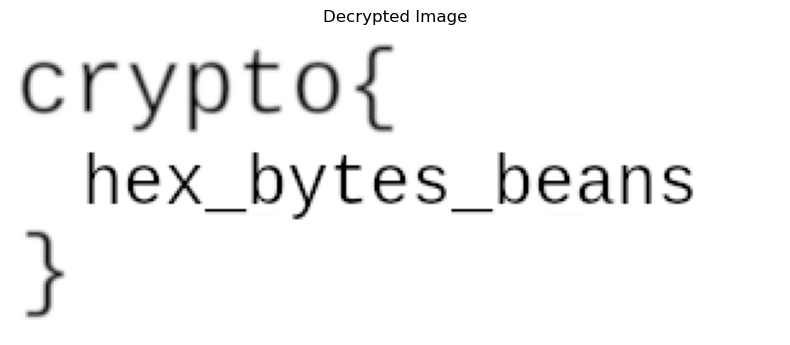

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image

def encrypt():
    url = "http://aes.cryptohack.org/bean_counter/encrypt/"
    rsp = requests.get(url)
    return rsp.json()['encrypted']

png_hdr = bytes([0x89, 0x50, 0x4e, 0x47, 0x0d, 0x0a, 0x1a, 0x0a, 0x00, 0x00, 0x00, 0x0d, 0x49, 0x48, 0x44, 0x52])
encrypted = bytes.fromhex(encrypt())
keystream = []
for i in range(len(png_hdr)):
    keystream.append(png_hdr[i] ^ encrypted[i])
png = [0]*len(encrypted)
for i in range(len(encrypted)):
    png[i] = encrypted[i] ^ keystream[i%len(keystream)]
with open('bean_counter.png', 'wb') as fd:
    fd.write(bytes(png))
img = Image.open('bean_counter.png')
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.title('Decrypted Image')
plt.tight_layout()
plt.show()

### CTRIME

In [5]:
import requests
import string
from Crypto.Util.Padding import unpad

def encrypt(plaintext):
    res = requests.get(f"http://aes.cryptohack.org/ctrime/encrypt/{plaintext.hex()}/")
    return bytes.fromhex(res.json()['ciphertext'])

flag = b'crypto{'
inv = ';'
while True:
    for i in range(32,127):
        cipher = encrypt((flag+inv.encode())*2)
        length = len(cipher)
        cipher = encrypt((flag+chr(i).encode())*2)
        if length > len(cipher):
            flag += chr(i).encode()
            break
    print(flag.decode())
    if chr(flag[-1]) == '}':
        break

crypto{C
crypto{CR
crypto{CRI
crypto{CRIM
crypto{CRIME
crypto{CRIME_
crypto{CRIME_5
crypto{CRIME_57
crypto{CRIME_571
crypto{CRIME_571l
crypto{CRIME_571ll
crypto{CRIME_571ll_
crypto{CRIME_571ll_p
crypto{CRIME_571ll_p4
crypto{CRIME_571ll_p4y
crypto{CRIME_571ll_p4y5
crypto{CRIME_571ll_p4y5}


### Logon Zero

In [ ]:
import socket
import json

HOST = "socket.cryptohack.org"
PORT = 13399
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.connect((HOST, PORT))
    s.recv(1024)
    while True:
        reset_msg = json.dumps({
            "option": "reset_password",
            "token": "00000000000000000000000000000000000000000000000000000000000000000000000000"
        }).encode() + b"\n"
        s.send(reset_msg)
        s.recv(1024)
        auth_msg = json.dumps({
            "option": "authenticate",
            "password": ""
        }).encode() + b"\n"
        s.send(auth_msg)
        response = s.recv(1024).decode()
        if "flag" in response:
            print(response.strip())
            break
        reset_conn = json.dumps({
            "option": "reset_connection"
        }).encode() + b"\n"
        s.send(reset_conn)
        s.recv(1024)

{"msg": "Welcome admin, flag: crypto{Zerologon_Windows_CVE-2020-1472}"}


### Stream of Consciousness

In [17]:
import requests

def print_blk(hex_blks, sz):
   for i in range(0, len(hex_blks), sz):
       print(hex_blks[i:i+sz], ' ', end='')
   print()

def encrypt():
    url = "http://aes.cryptohack.org/stream_consciousness/encrypt"
    rsp = requests.get(url)
    return rsp.json()['ciphertext']

def xor_all(ciphers, test_key):
    for cipher in ciphers:
        cipher = bytes.fromhex(cipher)
        for i in range(len(test_key)):
            if i >= len(cipher): break
            a = test_key[i] ^ cipher[i]
            if not (a > 31 and a < 127):
                return False
            print(chr(a), end='')
        print()
        print('cipher', bytes.hex(cipher))
    return True

def guess_next(cipher, key, guess):
    cipher = bytes.fromhex(cipher)
    for i in range(len(key)):
        if i >= len(cipher): break
        a = key[i] ^ cipher[i]
        print(chr(a), end='')
    print()
    if i + 1 < len(cipher) and guess:
        key.append(ord(guess) ^ cipher[i+1])

def test_key(cipher, key):
    for i in range(len(key)):
        if i >= len(cipher): break
        b = key[i] ^ cipher[i]
        print(chr(b), end='')
    print()

def dump_ciphers():
    ciphers = set()
    count = len(ciphers)
    with open('ciphers-1.txt', 'wb') as fd:
        for i in range(20):
            c = encrypt()
            ciphers.add(c)
            if len(ciphers) > count:
                count = len(ciphers)
                fd.write(c.encode()+b'\n')

def load_ciphers():
    ciphers = set()
    with open('ciphers.txt', 'rb') as fd:
        while True:
            line = fd.readline().strip().decode()
            if not line: break
            ciphers.add(line)
    return ciphers

def find_key_and_flag():
    prefix = b'crypto{'
    key = []
    encrypted_flag = b''
    for c in ciphers:
        c = bytes.fromhex(c)
        k = []
        for i in range(len(prefix)):
            k.append(prefix[i] ^ c[i]) 
        if xor_all(ciphers, k):
            print('found', k, len(k))
            key[:] = k[:]
            encrypted_flag = c
            break

        if key: break
    return key, encrypted_flag

#dump_ciphers()
ciphers = load_ciphers()
key, encrypted_flag = find_key_and_flag()
guess_next("9b645ac3ca3d8417cbb439a43713f6ace0f4a8cf5bed4bcc53fa5ffef57feb55369186cc4badd48d37c547c2a4306eb67d", key, ' ')
test_key(encrypted_flag, key)
guess_next("8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3", key, 'y')
test_key(encrypted_flag, key)
guess_next("8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3", key, 's')
test_key(encrypted_flag, key)
guess_next("8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3", key, ' ')
test_key(encrypted_flag, key)
guess_next("9b645ac3ca3d8417cbb439a43713f6ace0f4a8cf5bed4bcc53fa5ffef57feb55369186cc4badd48d37c547c2a4306eb67d", key, ' ')
guess_next(encrypted_flag.hex(), key, 'r')
guess_next(encrypted_flag.hex(), key, '3')
guess_next(encrypted_flag.hex(), key, '4')
guess_next(encrypted_flag.hex(), key, 'm')
guess_next(encrypted_flag.hex(), key, '_')
guess_next("8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3", key, 'g')
guess_next("92780d8adc6fa242c7f53cea325de7ede7eda28713fc03805dbf1df2bb28f7583d919cc00ca2c5d864ac0ad8e53026b6395c", key, 'y')
guess_next("9b645ac3ca3d8417cbb439a43713f6ace0f4a8cf5bed4bcc53fa5ffef57feb55369186cc4badd48d37c547c2a4306eb67d", key, 'h')
guess_next(encrypted_flag.hex(), key, '5')
guess_next(encrypted_flag.hex(), key, '3')
guess_next(encrypted_flag.hex(), key, '_')
guess_next("8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3", key, 'y')
guess_next("8d7f1bde8c7ced5bcca17deb305dfbe4fef3bcd45bed4c8d45bf0bfffe31bf4e36d499c048e5d4c337e10281b63169af3d0fc01ca0d5ae24f61fe41a5e1cbaa1be3ffbfd5194e56d96bafcc4be4de1c6f7494a53d7a5fa3f6cd17d6249389144ffe2c607fa24f4ea6475ec4ee6c7ae5a458a95e1adbe9430b33685e1fcc73054afc51216bfebfcaa67513ae99ace52e82b7b525a271932c17e0418a73658ec", key, 't')
guess_next(encrypted_flag.hex(), key, '_')
guess_next("92780d8adc6fa242c7f53cea325de7ede7eda28713fc03805dbf1df2bb28f7583d919cc00ca2c5d864ac0ad8e53026b6395c", key, 'b')
guess_next("92780d8adc6fa242c7f53cea325de7ede7eda28713fc03805dbf1df2bb28f7583d919cc00ca2c5d864ac0ad8e53026b6395c", key, 'e')
guess_next("8d7f1bde8c7ced59c2a629fd760ee2e9fbf1fbd313f057cc41fe16f9ef7ff75c379f", key, 't')
guess_next("8d7f1bde8c7ced59c2a629fd760ee2e9fbf1fbd313f057cc41fe16f9ef7ff75c379f", key, ' ')
guess_next("8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3", key, ' ')
guess_next("933709c2cd71a117cfba2ee17618f9e9e5e4afcf12f743cc50f11bb7f530eb1d34d4808544accd8c75ed04caeb", key, ' ')
test_key(encrypted_flag, key)

crypto{
cipher 8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3
ggcrn5e*k
cipher 8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3
gvi+|woP
cipher 8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3
rd+qs?A
cipher 8a7208c2cd6dbe17cbb07dec370eafe1feeea8c21fb9508454bf0be5fa36f11d32df908545b680ce76ef0c81a72769ac330a98599bd8af25a552ea065f1ca7bab222e3f5598eed6094fe
vi<9f*@
cipher 8e7f1f8ad878bf45cab731e17609e7e5f9fafbce08b9508450eb5fe3f33abf4d32c280854fa4ce8b63ac05c4e52a26b0325dd90cb899a328a556f1071a4ea0a0ab38a1
crypto{
cipher 9b645ac3ca3d8417cbb439a43713f6ace0f4a8cf5bed4bcc53fa5ffef57feb55369186cc4badd48d37c547c2a4306eb67d
ui8m2.`rja1.9
cipher 8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3
d~=f5d!q
cipher 8e7f08cfc93daf58daa67df62313e1e5f9faf7870bf5459558f118b7fa2bbf553cc387c05fe980ff72fe1ecebf3628e3
z0

### Dancing Queen

In [31]:
from pwn import *
from random import getrandbits

class ChaCha20:
    def __init__(self):
        self._state = []

    def _inner_block(self, state):
        self._quarter_round(state, 0, 4, 8, 12)
        self._quarter_round(state, 1, 5, 9, 13)
        self._quarter_round(state, 2, 6, 10, 14)
        self._quarter_round(state, 3, 7, 11, 15)
        self._quarter_round(state, 0, 5, 10, 15)
        self._quarter_round(state, 1, 6, 11, 12)
        self._quarter_round(state, 2, 7, 8, 13)
        self._quarter_round(state, 3, 4, 9, 14)

    def _quarter_round(self, x, a, b, c, d):
        x[a] = word(x[a] + x[b]); x[d] ^= x[a]; x[d] = rotate(x[d], 16)
        x[c] = word(x[c] + x[d]); x[b] ^= x[c]; x[b] = rotate(x[b], 12)
        x[a] = word(x[a] + x[b]); x[d] ^= x[a]; x[d] = rotate(x[d], 8)
        x[c] = word(x[c] + x[d]); x[b] ^= x[c]; x[b] = rotate(x[b], 7)

    def _setup_state(self, key, iv):
        self._state = [0x61707865, 0x3320646e, 0x79622d32, 0x6b206574]
        self._state.extend(bytes_to_words(key))
        self._state.append(self._counter)
        self._state.extend(bytes_to_words(iv))

    def decrypt(self, c, key, iv):
        return self.encrypt(c, key, iv)
    
    def encrypt(self, m, key, iv):
        c = b''
        self._counter = 1
        for i in range(0, len(m), 64):
            self._setup_state(key, iv)
            for j in range(10):
                self._inner_block(self._state)
            c += xor(m[i:i+64], words_to_bytes(self._state))
            self._counter += 1
        return c

def bytes_to_words(b):
    return [int.from_bytes(b[i:i+4], 'little') for i in range(0, len(b), 4)]

def words_to_bytes(w):
    return b''.join([i.to_bytes(4, 'little') for i in w])

def rotate(x, n):
    return ((x << n) & 0xffffffff) | ((x >> (32 - n)) & 0xffffffff)

def reverse_rotate(x, n):
    return ((x >> n) & 0xffffffff) | ((x << (32 - n)) & 0xffffffff)

def xor(a, b):
    return b''.join([bytes([x ^ y]) for x, y in zip(a, b)])

def word(x):
    return x % (2 ** 32)

def reverse_mod(a, b):
    if (a > b):
        return a - b
    else:
        return (a + 2**32) - b

def quarter_round(x, a, b, c, d):
    x[a] = word(x[a] + x[b]); x[d] ^= x[a]; x[d] = rotate(x[d], 16)
    x[c] = word(x[c] + x[d]); x[b] ^= x[c]; x[b] = rotate(x[b], 12)
    x[a] = word(x[a] + x[b]); x[d] ^= x[a]; x[d] = rotate(x[d], 8)
    x[c] = word(x[c] + x[d]); x[b] ^= x[c]; x[b] = rotate(x[b], 7)

def reverse_quarter(x, a, b, c, d):
    x[b] = reverse_rotate(x[b], 7); x[b] ^= x[c]; x[c] = reverse_mod(x[c], x[d])
    x[d] = reverse_rotate(x[d], 8); x[d] ^= x[a]; x[a] = reverse_mod(x[a], x[b])
    x[b] = reverse_rotate(x[b], 12); x[b] ^= x[c]; x[c] = reverse_mod(x[c], x[d])
    x[d] = reverse_rotate(x[d], 16); x[d] ^= x[a]; x[a] = reverse_mod(x[a], x[b])

def inner_block(state):
    quarter_round(state, 0, 4, 8, 12)
    quarter_round(state, 1, 5, 9, 13)
    quarter_round(state, 2, 6, 10, 14)
    quarter_round(state, 3, 7, 11, 15)
    quarter_round(state, 0, 5, 10, 15)
    quarter_round(state, 1, 6, 11, 12)
    quarter_round(state, 2, 7, 8, 13)
    quarter_round(state, 3, 4, 9, 14)

def reverse_inner(state):
    reverse_quarter(state, 3, 4, 9, 14)
    reverse_quarter(state, 2, 7, 8, 13)
    reverse_quarter(state, 1, 6, 11, 12)
    reverse_quarter(state, 0, 5, 10, 15)
    reverse_quarter(state, 3, 7, 11, 15)
    reverse_quarter(state, 2, 6, 10, 14)
    reverse_quarter(state, 1, 5, 9, 13)
    reverse_quarter(state, 0, 4, 8, 12)

def setup_state(key, iv, counter):
    state = []
    state = [0x61707865, 0x3320646e, 0x79622d32, 0x6b206574]
    state.extend(bytes_to_words(key))
    state.append(counter)
    state.extend(bytes_to_words(iv))
    return state

def encrypt(m, key, iv):
    c = b''
    counter = 1
    for i in range(0, len(m), 64):
        state = setup_state(key, iv, counter)
        for j in range(10):
            inner_block(state)
        c += xor(m[i:i+64], words_to_bytes(state))
        counter += 1
    return c

def recover_key(c, m, iv):
    counter = 1
    key = None
    for i in range(0, len(c), 64):
        state = xor(c[i:i+64], m[i:i+64])
        state = bytes_to_words(state)
        for j in range(10):
            reverse_inner(state)
        print(state)
        key = words_to_bytes(state[4:12])
        break
    return key

def sandbox():
    a = [getrandbits(32) for i in range(100)]
    for i,v in enumerate(a):
        for j in range(10):
            assert (reverse_rotate(rotate(v, j), j) == v)
    b = [getrandbits(32) for i in range(100)]
    for i,v in enumerate(a):
        c = word(a[i] + b[i])
        d = reverse_mod(c, b[i])
        assert(a[i] == d)
    state = [getrandbits(32) for i in range(16)]
    e = state.copy()
    quarter_round(state, 3, 4, 9, 14)
    d = state.copy()
    reverse_quarter(state, 3, 4, 9, 14)
    flag = 0
    for i in range(len(state)):
        assert(state[i] == e[i])
        if (state[i] != d[i]):
            flag = 1
    assert (flag == 1)
    f = state.copy()
    inner_block(state)
    g = state.copy()
    for i in range(len(state)):
        assert(state[i] != f[i])
    reverse_inner(state)
    for i in range(len(state)):
        assert(state[i] != g[i])
        assert(state[i] == f[i])
    m = b'h' * 64
    key = b'b' * 32
    iv = b'c' * 12
    enc = encrypt(m, key, iv)
    dec = encrypt(enc, key, iv)
    assert (dec == m)
    k = recover_key(enc, m, iv)
    print(k)
    assert (k == key)

def solve():
    iv1 = bytes.fromhex('e42758d6d218013ea63e3c49')
    iv2 = bytes.fromhex('a99f9a7d097daabd2aa2a235')
    msg = b'Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula.'[:64]
    msg_enc = bytes.fromhex('f3afbada8237af6e94c7d2065ee0e221a1748b8c7b11105a8cc8a1c74253611c94fe7ea6fa8a9133505772ef619f04b05d2e2b0732cc483df72ccebb09a92c211ef5a52628094f09a30fc692cb25647f')[:64]
    flag_enc = bytes.fromhex('b6327e9a2253034096344ad5694a2040b114753e24ea9c1af17c10263281fb0fe622b32732')
    key = recover_key(msg_enc, msg, iv1)
    print(key)
    assert(len(key) == 32)
    cipher = ChaCha20()
    flag_dec = cipher.encrypt(flag_enc, key, iv2)
    print(flag_dec)

sandbox()
solve()

[1634760805, 857760878, 2036477234, 1797285236, 1650614882, 1650614882, 1650614882, 1650614882, 1650614882, 1650614882, 1650614882, 1650614882, 1, 1667457891, 1667457891, 1667457891]
b'bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb'
[1634760805, 857760878, 2036477234, 1797285236, 269811001, 1531508478, 2693662451, 4136581883, 2202295096, 473046972, 3423948778, 1816740636, 1, 3596101604, 1040259282, 1228684966]
b'9\xfd\x14\x10\xfe\xf6H[\xf3\x06\x8e\xa0\xfb:\x8f\xf68[D\x83\xbc\x1f2\x1c\xeaO\x15\xcc\x1cCIl'
b'crypto{M1x1n6_r0und5_4r3_1nv3r71bl3!}'


# Padding Attacks

# Authenticated Encryption

### Paper Plane

In [11]:
import json
import requests
from pwn import xor
from tqdm import tqdm

def decryptionOracle(ct, m0, c0):
    print("Starting Oracle: ")
    plainText = b''
    for i in tqdm(range(1, 17), desc="outer loop", position=0, leave=True):
        temp = c0[:(16 - i)]
        pad = b''
        for j in tqdm(range(256), desc="inner loop", position=1, leave=False):
            guess = bytes([c0[(16 - i)] ^ j])
            if len(plainText) > 0:
                pad = bytes([i]) * (i - 1)
                c0_pad = temp + guess + xor(xor(plainText, pad), c0[(17 - i):])
            else:
                c0_pad = temp + guess
            r = requests.get('https://aes.cryptohack.org/paper_plane/send_msg/' 
                             + ct.hex() + "/" 
                             + m0.hex() + "/" 
                             + c0_pad.hex())
            if 'Message received' in r.text:
                if i == 1 and j == 0:
                    continue
                plainText = bytes([i ^ j]) + plainText
                print("Decrypted Text....: ", plainText)
                break
    return plainText

r = requests.get('https://aes.cryptohack.org/paper_plane/encrypt_flag')
encrypted_flag = json.loads(r.text)
ct = bytes.fromhex(encrypted_flag['ciphertext'])
m0 = bytes.fromhex(encrypted_flag['m0'])
c0 = bytes.fromhex(encrypted_flag['c0'])
x = ct[:16]
a = decryptionOracle(x, m0, c0)
y = ct[16:]
b = decryptionOracle(y, a, x)
print("Flag:", a + b)

Starting Oracle: 


outer loop:   6%|▋         | 1/16 [00:27<06:45, 27.06s/it]

Decrypted Text....:  b'l'


outer loop:  12%|█▎        | 2/16 [00:39<04:17, 18.41s/it]

Decrypted Text....:  b'3l'


outer loop:  19%|█▉        | 3/16 [01:10<05:16, 24.33s/it]

Decrypted Text....:  b't3l'


outer loop:  25%|██▌       | 4/16 [01:33<04:45, 23.80s/it]

Decrypted Text....:  b'_t3l'


outer loop:  31%|███▏      | 5/16 [01:46<03:39, 19.97s/it]

Decrypted Text....:  b'0_t3l'


outer loop:  38%|███▊      | 6/16 [02:15<03:48, 22.83s/it]

Decrypted Text....:  b'l0_t3l'


outer loop:  44%|████▍     | 7/16 [02:42<03:37, 24.20s/it]

Decrypted Text....:  b'll0_t3l'


outer loop:  50%|█████     | 8/16 [02:57<02:49, 21.20s/it]

Decrypted Text....:  b'3ll0_t3l'


outer loop:  56%|█████▋    | 9/16 [03:21<02:35, 22.15s/it]

Decrypted Text....:  b'h3ll0_t3l'


outer loop:  62%|██████▎   | 10/16 [03:49<02:24, 24.08s/it]

Decrypted Text....:  b'{h3ll0_t3l'


outer loop:  69%|██████▉   | 11/16 [04:15<02:02, 24.51s/it]

Decrypted Text....:  b'o{h3ll0_t3l'


outer loop:  75%|███████▌  | 12/16 [04:46<01:45, 26.50s/it]

Decrypted Text....:  b'to{h3ll0_t3l'


outer loop:  81%|████████▏ | 13/16 [05:18<01:24, 28.20s/it]

Decrypted Text....:  b'pto{h3ll0_t3l'


outer loop:  88%|████████▊ | 14/16 [05:48<00:57, 28.80s/it]

Decrypted Text....:  b'ypto{h3ll0_t3l'


outer loop:  94%|█████████▍| 15/16 [06:26<00:31, 31.54s/it]

Decrypted Text....:  b'rypto{h3ll0_t3l'


outer loop: 100%|██████████| 16/16 [06:55<00:00, 25.99s/it]


Decrypted Text....:  b'crypto{h3ll0_t3l'
Starting Oracle: 


outer loop:   6%|▋         | 1/16 [00:02<00:42,  2.82s/it]

Decrypted Text....:  b'\n'


outer loop:  12%|█▎        | 2/16 [00:04<00:33,  2.41s/it]

Decrypted Text....:  b'\n\n'


outer loop:  19%|█▉        | 3/16 [00:07<00:31,  2.43s/it]

Decrypted Text....:  b'\n\n\n'


outer loop:  25%|██▌       | 4/16 [00:11<00:34,  2.91s/it]

Decrypted Text....:  b'\n\n\n\n'


outer loop:  31%|███▏      | 5/16 [00:15<00:38,  3.54s/it]

Decrypted Text....:  b'\n\n\n\n\n'


outer loop:  38%|███▊      | 6/16 [00:20<00:38,  3.82s/it]

Decrypted Text....:  b'\n\n\n\n\n\n'


outer loop:  44%|████▍     | 7/16 [00:24<00:36,  4.05s/it]

Decrypted Text....:  b'\n\n\n\n\n\n\n'


outer loop:  50%|█████     | 8/16 [00:25<00:24,  3.00s/it]

Decrypted Text....:  b'\n\n\n\n\n\n\n\n'


outer loop:  56%|█████▋    | 9/16 [00:26<00:16,  2.38s/it]

Decrypted Text....:  b'\n\n\n\n\n\n\n\n\n'


outer loop:  62%|██████▎   | 10/16 [00:26<00:10,  1.71s/it]

Decrypted Text....:  b'\n\n\n\n\n\n\n\n\n\n'


outer loop:  69%|██████▉   | 11/16 [00:55<00:50, 10.15s/it]

Decrypted Text....:  b'}\n\n\n\n\n\n\n\n\n\n'


outer loop:  75%|███████▌  | 12/16 [01:25<01:04, 16.08s/it]

Decrypted Text....:  b'm}\n\n\n\n\n\n\n\n\n\n'


outer loop:  81%|████████▏ | 13/16 [01:39<00:46, 15.55s/it]

Decrypted Text....:  b'4m}\n\n\n\n\n\n\n\n\n\n'


outer loop:  88%|████████▊ | 14/16 [02:10<00:40, 20.19s/it]

Decrypted Text....:  b'r4m}\n\n\n\n\n\n\n\n\n\n'


outer loop:  94%|█████████▍| 15/16 [02:36<00:21, 21.91s/it]

Decrypted Text....:  b'gr4m}\n\n\n\n\n\n\n\n\n\n'


outer loop: 100%|██████████| 16/16 [02:46<00:00, 10.38s/it]

Decrypted Text....:  b'3gr4m}\n\n\n\n\n\n\n\n\n\n'
Flag: b'crypto{h3ll0_t3l3gr4m}\n\n\n\n\n\n\n\n\n\n'


# Linear Cryptanalysis

###  Beatboxer

In [ ]:
#!/usr/bin/env python3
import json
from pwn import remote
import sys

AES_POLY = 0x11b

def gf256_mul(a, b):
    p = 0
    for i in range(8):
        if b & 1:
            p ^= a
        carry = a & 0x80
        a <<= 1
        if carry:
            a ^= AES_POLY
        a &= 0xFF
        b >>= 1
    return p

def gf256_inv_elem(x):
    if x == 0:
        raise ValueError("0 has no multiplicative inverse")
    for i in range(256):
        if gf256_mul(x, i) == 1:
            return i
    raise ValueError("No inverse found?!")

def gf256_matvec_mul(mat, vec):
    res = [0] * len(vec)
    for i in range(len(mat)):
        s = 0
        for j in range(len(vec)):
            s ^= gf256_mul(mat[i][j], vec[j])
        res[i] = s
    return res

def gf256_matrix_inverse(matrix):
    n = len(matrix)
    aug = [row[:] + [1 if i == j else 0 for j in range(n)] for i, row in enumerate(matrix)]
    for i in range(n):
        if aug[i][i] == 0:
            for j in range(i+1, n):
                if aug[j][i] != 0:
                    aug[i], aug[j] = aug[j], aug[i]
                    break
            else:
                raise ValueError("Matrix is singular and not invertible")
        inv_pivot = gf256_inv_elem(aug[i][i])
        for k in range(2*n):
            aug[i][k] = gf256_mul(aug[i][k], inv_pivot)
        for j in range(n):
            if j != i and aug[j][i] != 0:
                factor = aug[j][i]
                for k in range(2*n):
                    aug[j][k] ^= gf256_mul(factor, aug[i][k])
    inv_matrix = [row[n:] for row in aug]
    return inv_matrix

class AES:
    sbox = (
        0x2a, 0x00, 0x7e, 0x54, 0x82, 0xa8, 0xd6, 0xfc, 0x61, 0x4b, 0x35, 0x1f, 0xc9, 0xe3, 0x9d, 0xb7,
        0xbc, 0x96, 0xe8, 0xc2, 0x14, 0x3e, 0x40, 0x6a, 0xf7, 0xdd, 0xa3, 0x89, 0x5f, 0x75, 0x0b, 0x21,
        0x1d, 0x37, 0x49, 0x63, 0xb5, 0x9f, 0xe1, 0xcb, 0x56, 0x7c, 0x02, 0x28, 0xfe, 0xd4, 0xaa, 0x80,
        0x8b, 0xa1, 0xdf, 0xf5, 0x23, 0x09, 0x77, 0x5d, 0xc0, 0xea, 0x94, 0xbe, 0x68, 0x42, 0x3c, 0x16,
        0x44, 0x6e, 0x10, 0x3a, 0xec, 0xc6, 0xb8, 0x92, 0x0f, 0x25, 0x5b, 0x71, 0xa7, 0x8d, 0xf3, 0xd9, 
        0xd2, 0xf8, 0x86, 0xac, 0x7a, 0x50, 0x2e, 0x04, 0x99, 0xb3, 0xcd, 0xe7, 0x31, 0x1b, 0x65, 0x4f,
        0x73, 0x59, 0x27, 0x0d, 0xdb, 0xf1, 0x8f, 0xa5, 0x38, 0x12, 0x6c, 0x46, 0x90, 0xba, 0xc4, 0xee,
        0xe5, 0xcf, 0xb1, 0x9b, 0x4d, 0x67, 0x19, 0x33, 0xae, 0x84, 0xfa, 0xd0, 0x06, 0x2c, 0x52, 0x78,
        0xf6, 0xdc, 0xa2, 0x88, 0x5e, 0x74, 0x0a, 0x20, 0xbd, 0x97, 0xe9, 0xc3, 0x15, 0x3f, 0x41, 0x6b,
        0x60, 0x4a, 0x34, 0x1e, 0xc8, 0xe2, 0x9c, 0xb6, 0x2b, 0x01, 0x7f, 0x55, 0x83, 0xa9, 0xd7, 0xfd,
        0xc1, 0xeb, 0x95, 0xbf, 0x69, 0x43, 0x3d, 0x17, 0x8a, 0xa0, 0xde, 0xf4, 0x22, 0x08, 0x76, 0x5c,
        0x57, 0x7d, 0x03, 0x29, 0xff, 0xd5, 0xab, 0x81, 0x1c, 0x36, 0x48, 0x62, 0xb4, 0x9e, 0xe0, 0xca,
        0x98, 0xb2, 0xcc, 0xe6, 0x30, 0x1a, 0x64, 0x4e, 0xd3, 0xf9, 0x87, 0xad, 0x7b, 0x51, 0x2f, 0x05,
        0x0e, 0x24, 0x5a, 0x70, 0xa6, 0x8c, 0xf2, 0xd8, 0x45, 0x6f, 0x11, 0x3b, 0xed, 0xc7, 0xb9, 0x93, 
        0xaf, 0x85, 0xfb, 0xd1, 0x07, 0x2d, 0x53, 0x79, 0xe4, 0xce, 0xb0, 0x9a, 0x4c, 0x66, 0x18, 0x32, 
        0x39, 0x13, 0x6d, 0x47, 0x91, 0xbb, 0xc5, 0xef, 0x72, 0x58, 0x26, 0x0c, 0xda, 0xf0, 0x8e, 0xa4
    )

    rcon = (0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36)

    gmul2 = (
        0x00, 0x02, 0x04, 0x06, 0x08, 0x0a, 0x0c, 0x0e, 0x10, 0x12, 0x14, 0x16, 0x18, 0x1a, 0x1c, 0x1e, 
        0x20, 0x22, 0x24, 0x26, 0x28, 0x2a, 0x2c, 0x2e, 0x30, 0x32, 0x34, 0x36, 0x38, 0x3a, 0x3c, 0x3e, 
        0x40, 0x42, 0x44, 0x46, 0x48, 0x4a, 0x4c, 0x4e, 0x50, 0x52, 0x54, 0x56, 0x58, 0x5a, 0x5c, 0x5e, 
        0x60, 0x62, 0x64, 0x66, 0x68, 0x6a, 0x6c, 0x6e, 0x70, 0x72, 0x74, 0x76, 0x78, 0x7a, 0x7c, 0x7e, 
        0x80, 0x82, 0x84, 0x86, 0x88, 0x8a, 0x8c, 0x8e, 0x90, 0x92, 0x94, 0x96, 0x98, 0x9a, 0x9c, 0x9e, 
        0xa0, 0xa2, 0xa4, 0xa6, 0xa8, 0xaa, 0xac, 0xae, 0xb0, 0xb2, 0xb4, 0xb6, 0xb8, 0xba, 0xbc, 0xbe, 
        0xc0, 0xc2, 0xc4, 0xc6, 0xc8, 0xca, 0xcc, 0xce, 0xd0, 0xd2, 0xd4, 0xd6, 0xd8, 0xda, 0xdc, 0xde, 
        0xe0, 0xe2, 0xe4, 0xe6, 0xe8, 0xea, 0xec, 0xee, 0xf0, 0xf2, 0xf4, 0xf6, 0xf8, 0xfa, 0xfc, 0xfe, 
        0x1b, 0x19, 0x1f, 0x1d, 0x13, 0x11, 0x17, 0x15, 0x0b, 0x09, 0x0f, 0x0d, 0x03, 0x01, 0x07, 0x05, 
        0x3b, 0x39, 0x3f, 0x3d, 0x33, 0x31, 0x37, 0x35, 0x2b, 0x29, 0x2f, 0x2d, 0x23, 0x21, 0x27, 0x25, 
        0x5b, 0x59, 0x5f, 0x5d, 0x53, 0x51, 0x57, 0x55, 0x4b, 0x49, 0x4f, 0x4d, 0x43, 0x41, 0x47, 0x45, 
        0x7b, 0x79, 0x7f, 0x7d, 0x73, 0x71, 0x77, 0x75, 0x6b, 0x69, 0x6f, 0x6d, 0x63, 0x61, 0x67, 0x65, 
        0x9b, 0x99, 0x9f, 0x9d, 0x93, 0x91, 0x97, 0x95, 0x8b, 0x89, 0x8f, 0x8d, 0x83, 0x81, 0x87, 0x85, 
        0xbb, 0xb9, 0xbf, 0xbd, 0xb3, 0xb1, 0xb7, 0xb5, 0xab, 0xa9, 0xaf, 0xad, 0xa3, 0xa1, 0xa7, 0xa5, 
        0xdb, 0xd9, 0xdf, 0xdd, 0xd3, 0xd1, 0xd7, 0xd5, 0xcb, 0xc9, 0xcf, 0xcd, 0xc3, 0xc1, 0xc7, 0xc5, 
        0xfb, 0xf9, 0xff, 0xfd, 0xf3, 0xf1, 0xf7, 0xf5, 0xeb, 0xe9, 0xef, 0xed, 0xe3, 0xe1, 0xe7, 0xe5
    )

    gmul3 = (
        0x00, 0x03, 0x06, 0x05, 0x0c, 0x0f, 0x0a, 0x09, 0x18, 0x1b, 0x1e, 0x1d, 0x14, 0x17, 0x12, 0x11, 
        0x30, 0x33, 0x36, 0x35, 0x3c, 0x3f, 0x3a, 0x39, 0x28, 0x2b, 0x2e, 0x2d, 0x24, 0x27, 0x22, 0x21, 
        0x60, 0x63, 0x66, 0x65, 0x6c, 0x6f, 0x6a, 0x69, 0x78, 0x7b, 0x7e, 0x7d, 0x74, 0x77, 0x72, 0x71, 
        0x50, 0x53, 0x56, 0x55, 0x5c, 0x5f, 0x5a, 0x59, 0x48, 0x4b, 0x4e, 0x4d, 0x44, 0x47, 0x42, 0x41, 
        0xc0, 0xc3, 0xc6, 0xc5, 0xcc, 0xcf, 0xca, 0xc9, 0xd8, 0xdb, 0xde, 0xdd, 0xd4, 0xd7, 0xd2, 0xd1, 
        0xf0, 0xf3, 0xf6, 0xf5, 0xfc, 0xff, 0xfa, 0xf9, 0xe8, 0xeb, 0xee, 0xed, 0xe4, 0xe7, 0xe2, 0xe1, 
        0xa0, 0xa3, 0xa6, 0xa5, 0xac, 0xaf, 0xaa, 0xa9, 0xb8, 0xbb, 0xbe, 0xbd, 0xb4, 0xb7, 0xb2, 0xb1, 
        0x90, 0x93, 0x96, 0x95, 0x9c, 0x9f, 0x9a, 0x99, 0x88, 0x8b, 0x8e, 0x8d, 0x84, 0x87, 0x82, 0x81, 
        0x9b, 0x98, 0x9d, 0x9e, 0x97, 0x94, 0x91, 0x92, 0x83, 0x80, 0x85, 0x86, 0x8f, 0x8c, 0x89, 0x8a, 
        0xab, 0xa8, 0xad, 0xae, 0xa7, 0xa4, 0xa1, 0xa2, 0xb3, 0xb0, 0xb5, 0xb6, 0xbf, 0xbc, 0xb9, 0xba, 
        0xfb, 0xf8, 0xfd, 0xfe, 0xf7, 0xf4, 0xf1, 0xf2, 0xe3, 0xe0, 0xe5, 0xe6, 0xef, 0xec, 0xe9, 0xea, 
        0xcb, 0xc8, 0xcd, 0xce, 0xc7, 0xc4, 0xc1, 0xc2, 0xd3, 0xd0, 0xd5, 0xd6, 0xdf, 0xdc, 0xd9, 0xda, 
        0x5b, 0x58, 0x5d, 0x5e, 0x57, 0x54, 0x51, 0x52, 0x43, 0x40, 0x45, 0x46, 0x4f, 0x4c, 0x49, 0x4a, 
        0x6b, 0x68, 0x6d, 0x6e, 0x67, 0x64, 0x61, 0x62, 0x73, 0x70, 0x75, 0x76, 0x7f, 0x7c, 0x79, 0x7a, 
        0x3b, 0x38, 0x3d, 0x3e, 0x37, 0x34, 0x31, 0x32, 0x23, 0x20, 0x25, 0x26, 0x2f, 0x2c, 0x29, 0x2a, 
        0x0b, 0x08, 0x0d, 0x0e, 0x07, 0x04, 0x01, 0x02, 0x13, 0x10, 0x15, 0x16, 0x1f, 0x1c, 0x19, 0x1a
    )

    def __init__(self, key):
        self._block_size = 16
        self._round_keys = self._expand_key(list(key))
        self._state = []

    def _transpose(self, m):
        return [m[4 * j + i] for i in range(4) for j in range(4)]

    def _xor(self, a, b):
        return [x ^ y for x, y in zip(a, b)]

    def _expand_key(self, key):
        round_keys = [key]
        for i in range(10):
            round_key = []
            first = round_keys[i][:4]
            last = round_keys[i][-4:]
            last = last[1:] + [last[0]]
            last = [self.sbox[i] for i in last]
            round_key.extend(self._xor(self._xor(first, last), [self.rcon[i+1], 0, 0, 0]))
            for j in range(0, 12, 4):
                round_key.extend(self._xor(round_key[j:j + 4], round_keys[i][j + 4:j + 8]))
            round_keys.append(round_key)
        for i in range(len(round_keys)):
            round_keys[i] = self._transpose(round_keys[i])
        return round_keys

    def _add_round_key(self, i):
        self._state = self._xor(self._round_keys[i], self._state)

    def _mix_columns(self):
        s = [0] * self._block_size
        for i in range(4):
            s[i]       = self.gmul2[self._state[i]] ^ self.gmul3[self._state[i + 4]] ^ self._state[i + 8] ^ self._state[i + 12]
            s[i + 4]   = self._state[i] ^ self.gmul2[self._state[i + 4]] ^ self.gmul3[self._state[i + 8]] ^ self._state[i + 12]
            s[i + 8]   = self._state[i] ^ self._state[i + 4] ^ self.gmul2[self._state[i + 8]] ^ self.gmul3[self._state[i + 12]]
            s[i + 12]  = self.gmul3[self._state[i]] ^ self._state[i + 4] ^ self._state[i + 8] ^ self.gmul2[self._state[i + 12]]
        self._state = s

    def _shift_rows(self):
        self._state = [
            self._state[0], self._state[1], self._state[2], self._state[3],
            self._state[5], self._state[6], self._state[7], self._state[4],
            self._state[10], self._state[11], self._state[8], self._state[9],
            self._state[15], self._state[12], self._state[13], self._state[14]
        ]

    def _sub_bytes(self):
        self._state = [self.sbox[i] for i in self._state]

    def _encrypt_block(self):
        self._add_round_key(0)
        for i in range(1, 10):
            self._sub_bytes()
            self._shift_rows()
            self._mix_columns()
            self._add_round_key(i)
        self._sub_bytes()
        self._shift_rows()
        self._add_round_key(10)

    def encrypt(self, plaintext):
        ciphertext = b''
        self._state = self._transpose(list(plaintext))
        self._encrypt_block()
        ciphertext += bytes(self._transpose(self._state))
        return ciphertext

def bytes_to_int_list(b):
    return [x for x in b]

def xor_bytes(b1, b2):
    return bytes(a ^ b for a, b in zip(b1, b2))

def main():
    host = "socket.cryptohack.org"
    port = 13406
    r = remote(host, port)
    welcome = r.recvline().decode().strip()
    print("[*] Welcome message:")
    print(welcome)
    plaintext_hex = "00" * 16
    query = {"option": "encrypt_message", "message": plaintext_hex}
    r.sendline(json.dumps(query).encode())
    response = r.recvline().decode().strip()
    print("[*] Response from encrypt_message:")
    print(response)
    try:
        resp_json = json.loads(response)
    except Exception as e:
        print("[-] Failed to parse JSON response:", e)
        sys.exit(1)
    if "error" in resp_json:
        print("[-] Error:", resp_json["error"])
        sys.exit(1)
    remote_B_hex = resp_json["encrypted_message"]
    remote_B = bytes.fromhex(remote_B_hex)
    print("[*] Remote B (AES(0) from server):", remote_B_hex)
    query_flag = {"option": "encrypt_flag"}
    r.sendline(json.dumps(query_flag).encode())
    flag_response = r.recvline().decode().strip()
    print("[*] Response from encrypt_flag:")
    print(flag_response)
    try:
        flag_json = json.loads(flag_response)
    except Exception as e:
        print("[-] Failed to parse flag JSON:", e)
        sys.exit(1)
    encrypted_flag_hex = flag_json["encrypted_flag"]
    encrypted_flag = bytes.fromhex(encrypted_flag_hex)
    print("[*] Encrypted flag (hex):", encrypted_flag_hex)
    r.close()
    dummy_key = b"\x00" * 16
    aes_local = AES(dummy_key)
    B_dummy = aes_local.encrypt(b"\x00" * 16)
    A_matrix = [[0]*16 for _ in range(16)]
    for i in range(16):
        basis = bytearray(16)
        basis[i] = 1
        enc_basis = aes_local.encrypt(bytes(basis))
        col = xor_bytes(enc_basis, B_dummy)
        for row in range(16):
            A_matrix[row][i] = col[row]
    print("[*] Recovered matrix A (local simulation):")
    for row in A_matrix:
        print(" ".join(f"{x:02x}" for x in row))
    try:
        A_inv = gf256_matrix_inverse(A_matrix)
    except Exception as e:
        print("[-] Failed to invert A:", e)
        sys.exit(1)
    print("[*] Inverted matrix A_inv:")
    for row in A_inv:
        print(" ".join(f"{x:02x}" for x in row))
    flag_bytes = b""
    for i in range(0, len(encrypted_flag), 16):
        block = encrypted_flag[i:i+16]
        xored = bytes(a ^ b for a, b in zip(block, remote_B))
        xored_vec = list(xored)
        plain_vec = gf256_matvec_mul(A_inv, xored_vec)
        flag_bytes += bytes(plain_vec)
    pad = flag_bytes[-1]
    if all(b == pad for b in flag_bytes[-pad:]):
        flag_bytes = flag_bytes[:-pad]
    print("[*] Decrypted flag:")
    print(flag_bytes.decode())

if __name__ == "__main__":
    main()



[x] Opening connection to socket.cryptohack.org on port 13406
[x] Opening connection to socket.cryptohack.org on port 13406: Trying 134.122.111.232
[+] Opening connection to socket.cryptohack.org on port 13406: Done
[*] Welcome message:
Welcome to my military grade encryption service! Try it out by encrypting a message. You can even encrypt the flag, you will not be able to decrypt it anyway...
[*] Response from encrypt_message:
{"encrypted_message": "30ce6ca83bd054bf5aad37dd7eb37733"}
[*] Remote B (AES(0) from server): 30ce6ca83bd054bf5aad37dd7eb37733
[*] Response from encrypt_flag:
{"encrypted_flag": "9fd9b1e6a20fa5dc549dc3a8c22fbcdffd2845f4e3115fdc8fb93bc94bafc95a5659b5f4ac7408760470bb8ddc3f936d"}
[*] Encrypted flag (hex): 9fd9b1e6a20fa5dc549dc3a8c22fbcdffd2845f4e3115fdc8fb93bc94bafc95a5659b5f4ac7408760470bb8ddc3f936d
[*] Closed connection to socket.cryptohack.org port 13406
[*] Recovered matrix A (local simulation):
74 00 00 00 00 4e 00 00 00 00 3a 00 00 00 00 3a
00 00 00 3a 3a 00 